In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

# Binary classification

## When to use binary classification?

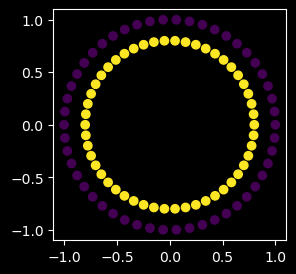

In [2]:
from sklearn.datasets import make_circles
coordinates, labels = make_circles(100)
df=pd.DataFrame(dict(x=coordinates[:,0], y=coordinates[:,1], label=labels))
plt.figure(figsize=(3,3))
_ = plt.scatter(df.x, df.y, c=df.label)

## Our dataset

In [3]:
df

,x,y,label
0,0.428661,6.754623e-01,1
1,-0.050232,-7.984214e-01,1
2,0.509939,6.164106e-01,1
3,-1.000000,-3.216245e-16,0
4,-0.583175,-5.476377e-01,1
...,...,...,...
95,0.929776,3.681246e-01,0
96,-0.647214,4.702282e-01,1
97,-0.309017,-9.510565e-01,0
98,0.583175,5.476377e-01,1


## Pairplots

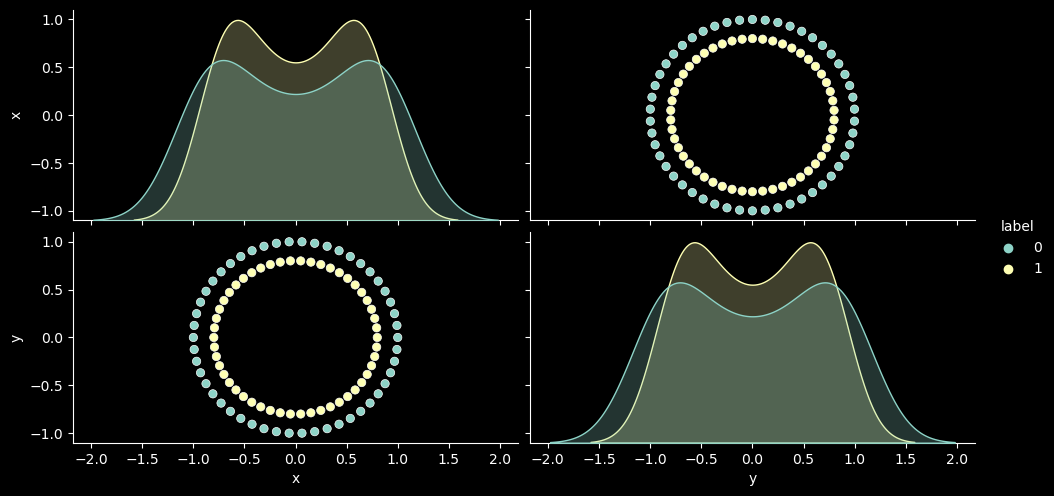

In [4]:
_ = sns.pairplot(df, hue='label', aspect=2)

## Let's build it

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Instantiate a sequential model
model = Sequential()

We have two neurons as an input layer, one for the x coordinate and another for the y coordinate of each of the red and blue circles in the graph.

Then we have one hidden layer with four neurons. Four is a good enough number to learn the separation of classes in this dataset. This was found by experimentation. 

In [6]:
# Add input and hidden layer
model.add(Dense(4, input_shape=(2,), activation='tanh'))

We finally end up with a single output neuron which makes use of the sigmoid activation function. It's important to note that, regardless of the activation functions used for the previous layers, we do need the sigmoid activation function for this last output node.

The sigmoid activation function squashes the neuron output of the second to last layer to a floating point number between 0 and 1.

In [7]:
# Add output layer, use sigmoid
model.add(Dense(1, activation='sigmoid'))

## Compiling, training, predicting

We will use stochastic gradient descent as an optimizer and binary cross-entropy as our loss function. Binary cross-entropy is the function we use when our output neuron is using sigmoid as its activation function.

In [8]:
# Compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')
# Train model

In [9]:
model.fit(coordinates, labels, epochs=20)
# Predict with trained model
preds = model.predict(coordinates)

Epoch 1/20
4/4 [==============================] - 1s 2ms/step - loss: 0.7593 - accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 0s 996us/step - loss: 0.7589 - accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 0s 988us/step - loss: 0.7579 - accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 0s 1ms/step - loss: 0.7573 - accuracy: 0.5000
Epoch 5/20
4/4 [==============================] - 0s 944us/step - loss: 0.7561 - accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 0s 928us/step - loss: 0.7555 - accuracy: 0.5000
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.7542 - accuracy: 0.5000
Epoch 8/20
4/4 [==============================] - 0s 892us/step - loss: 0.7530 - accuracy: 0.5000
Epoch 9/20
4/4 [==============================] - 0s 826us/step - loss: 0.7517 - accuracy: 0.5000
Epoch 10/20
4/4 [==============================] - 0s 786us/step - loss: 0.7512 - accuracy: 0.5000
Epoch 11/20
4/4 [========

## Exercises

### Exploring dollar bills

You will practice building classification models in Keras with the Banknote Authentication dataset.

Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: variance,skewness,kurtosis and entropy. These features are calculated by applying mathematical operations over the dollar bill images. The labels are found in the dataframe's class column.

In [10]:
banknotes = pd.read_csv('banknotes.csv')
banknotes['class'] = np.array(['real', 'fake'])[banknotes['class']]
banknotes['class'] = pd.Categorical(banknotes['class'], categories=['real', 'fake'])
banknotes

,variace,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,real
1,4.54590,8.16740,-2.4586,-1.46210,real
2,3.86600,-2.63830,1.9242,0.10645,real
3,3.45660,9.52280,-4.0112,-3.59440,real
4,0.32924,-4.45520,4.5718,-0.98880,real
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,fake
1368,-1.38870,-4.87730,6.4774,0.34179,fake
1369,-3.75030,-13.45860,17.5932,-2.77710,fake
1370,-3.56370,-8.38270,12.3930,-1.28230,fake


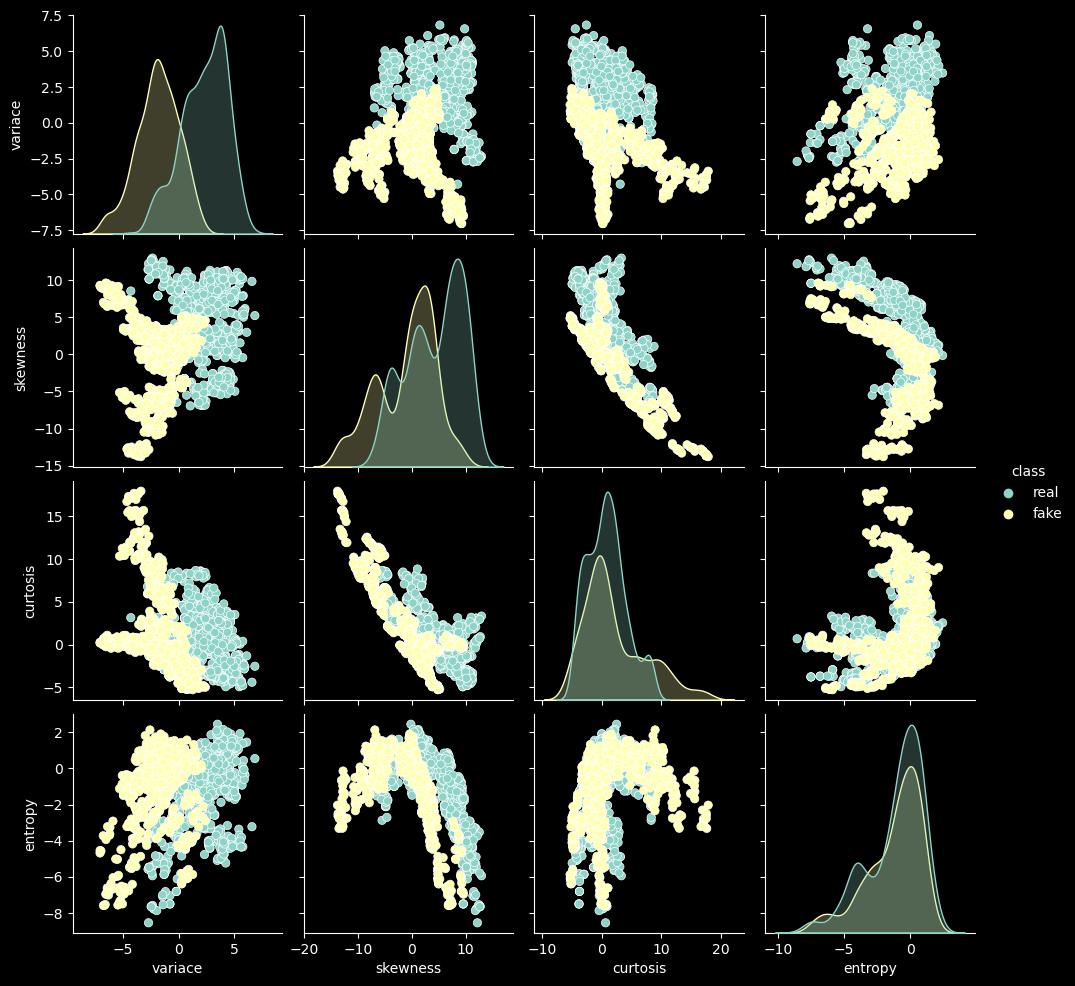

In [11]:
# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 
# Show the plot
plt.show()

In [12]:
# Describe the data
print('Dataset stats: \n', banknotes.describe())
# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

Dataset stats: 
            variace     skewness     curtosis      entropy
count  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657
std       2.842763     5.869047     4.310030     2.101013
min      -7.042100   -13.773100    -5.286100    -8.548200
25%      -1.773000    -1.708200    -1.574975    -2.413450
50%       0.496180     2.319650     0.616630    -0.586650
75%       2.821475     6.814625     3.179250     0.394810
max       6.824800    12.951600    17.927400     2.449500
Observations per class: 
 real    762
fake    610
Name: class, dtype: int64


Your pairplot shows that there are features for which the classes spread out noticeably. This gives us an intuition about our classes being easily separable. Let's build a model to find out what it can do!

### A binary classification model

Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's a fake bill.

* Add a 4 neuron input layer with the input_shape parameter and a 1 neuron output layer with sigmoid activation.

In [13]:
# Create a sequential model
model = Sequential()
# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Display a summary of your model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


### Is this dollar bill fake ?

You are now ready to train your model and check how well it performs when classifying new bills!

The dataset has already been partitioned into features: X_train & X_test, and labels: y_train & y_test.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(banknotes.iloc[:,:-1], banknotes['class'].cat.codes, test_size=412)

In [15]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

Epoch 1/20
30/30 [==============================] - 0s 664us/step - loss: 0.6295 - accuracy: 0.7604
Epoch 2/20
30/30 [==============================] - 0s 606us/step - loss: 0.2701 - accuracy: 0.9187
Epoch 3/20
30/30 [==============================] - 0s 609us/step - loss: 0.2406 - accuracy: 0.9292
Epoch 4/20
30/30 [==============================] - 0s 613us/step - loss: 0.2215 - accuracy: 0.9333
Epoch 5/20
30/30 [==============================] - 0s 585us/step - loss: 0.2073 - accuracy: 0.9354
Epoch 6/20
30/30 [==============================] - 0s 597us/step - loss: 0.1961 - accuracy: 0.9427
Epoch 7/20
30/30 [==============================] - 0s 567us/step - loss: 0.1868 - accuracy: 0.9438
Epoch 8/20
30/30 [==============================] - 0s 610us/step - loss: 0.1790 - accuracy: 0.9448
Epoch 9/20
30/30 [==============================] - 0s 622us/step - loss: 0.1722 - accuracy: 0.9469
Epoch 10/20
30/30 [==============================] - 0s 581us/step - loss: 0.1662 - accuracy: 0.9479

In [16]:
# Evaluate your model loss and accuracy on the test set
print('loss: {} accuracy: {}'.format(*model.evaluate(X_test, y_test)))

13/13 [==============================] - 0s 798us/step - loss: 0.1164 - accuracy: 0.9709
loss: 0.11635209619998932 accuracy: 0.9708737730979919


# Multi-class classification

## The dataset: throwing darts

In [17]:
darts = pd.read_csv('darts.csv')
darts['competitor'] = pd.Categorical(darts['competitor'])
darts

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve
...,...,...,...
795,0.320435,-0.327131,Kate
796,-0.179372,0.594201,Steve
797,0.530315,-0.833321,Michael
798,-0.287258,0.890928,Michael


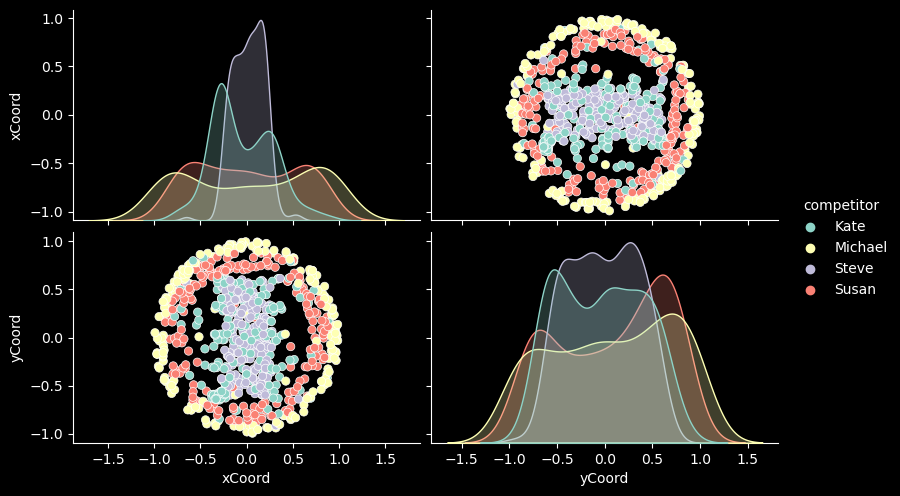

In [18]:
_ = sns.pairplot(darts, hue='competitor', aspect=1.6)

## The architecture

In [19]:
model = Sequential()
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

When compiling your model, instead of binary cross-entropy as we used before, we now use categorical cross-entropy or log loss. Categorical cross-entropy measures the difference between the predicted probabilities and the true label of the class we should have predicted.

In [20]:
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Display a summary of your model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 4)                 132       
                                                                 
Total params: 10,852
Trainable params: 10,852
Non-trainable params: 0
_________________________________________________________________


## Preparing a one-hot encoding

In [21]:
darts['competitor'].cat.codes

0      2
1      3
2      1
3      0
4      2
      ..
795    0
796    2
797    1
798    1
799    3
Length: 800, dtype: int8

In [22]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(darts['competitor'].cat.codes)
y

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

## Fit and evaluate

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(darts.iloc[:,:-1], y, test_size=.2)

In [24]:
model.fit(X_train, y_train, epochs = 200)

Epoch 1/200
20/20 [==============================] - 0s 781us/step - loss: 1.3748 - accuracy: 0.2859
Epoch 2/200
20/20 [==============================] - 0s 720us/step - loss: 1.3311 - accuracy: 0.3203
Epoch 3/200
20/20 [==============================] - 0s 733us/step - loss: 1.2779 - accuracy: 0.4234
Epoch 4/200
20/20 [==============================] - 0s 734us/step - loss: 1.2075 - accuracy: 0.4891
Epoch 5/200
20/20 [==============================] - 0s 710us/step - loss: 1.1180 - accuracy: 0.5437
Epoch 6/200
20/20 [==============================] - 0s 690us/step - loss: 1.0234 - accuracy: 0.5453
Epoch 7/200
20/20 [==============================] - 0s 703us/step - loss: 0.9443 - accuracy: 0.5688
Epoch 8/200
20/20 [==============================] - 0s 699us/step - loss: 0.8863 - accuracy: 0.6172
Epoch 9/200
20/20 [==============================] - 0s 715us/step - loss: 0.8477 - accuracy: 0.6438
Epoch 10/200
20/20 [==============================] - 0s 716us/step - loss: 0.8154 - accura

In [25]:
# Evaluate your model loss and accuracy on the test set
print('loss: {} accuracy: {}'.format(*model.evaluate(X_test, y_test)))

5/5 [==============================] - 0s 871us/step - loss: 0.6460 - accuracy: 0.7875
loss: 0.646008312702179 accuracy: 0.7875000238418579


## Softmax predictions

Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on the test set.

Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 4 possible competitors.

When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!

In [26]:
# Predict on coords_small_test
coords_small_test = X_test.head(10)
competitors_small_test = y[0:10]
preds = model.predict(coords_small_test)

1/1 [==============================] - 0s 25ms/step


In [27]:
# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
    print("{} | {}".format(pred, competitors_small_test[i]))

Raw Model Predictions                         | True labels
[0.2742506  0.01425234 0.3207121  0.390785  ] | [0. 0. 1. 0.]
[0.16114242 0.01021434 0.7901351  0.03850824] | [0. 0. 0. 1.]
[0.17011586 0.01260061 0.77141774 0.04586574] | [0. 1. 0. 0.]
[0.28511134 0.01858889 0.6901821  0.00611765] | [1. 0. 0. 0.]
[0.5808546  0.01357689 0.3624769  0.04309166] | [0. 0. 1. 0.]
[0.24808659 0.0167163  0.7289808  0.00621635] | [1. 0. 0. 0.]
[0.2504778  0.01219677 0.63972163 0.09760382] | [1. 0. 0. 0.]
[0.01706094 0.9020627  0.00355755 0.07731875] | [0. 0. 1. 0.]
[0.8631179  0.01993801 0.0981389  0.01880523] | [0. 0. 0. 1.]
[0.58352447 0.01459072 0.37551838 0.02636639] | [1. 0. 0. 0.]


In [28]:
# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]
# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
    print("{:25} | {}".format(pred, competitors_small_test[i]))

Rounded Model Predictions | True labels
                        3 | [0. 0. 1. 0.]
                        2 | [0. 0. 0. 1.]
                        2 | [0. 1. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        0 | [0. 0. 1. 0.]
                        2 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        1 | [0. 0. 1. 0.]
                        0 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]


In [29]:
competitors_small_test

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

In [30]:
coords_small_test

,xCoord,yCoord
243,0.198165,-0.674646
298,0.044973,-0.550069
729,-0.092275,0.479468
664,0.119078,-0.075404
305,-0.229537,0.485221
479,0.031992,-0.001829
268,-0.123259,-0.597437
194,0.893497,-0.218881
648,0.361341,0.333276
409,-0.249989,0.356025


In [31]:
model.evaluate(coords_small_test, competitors_small_test)

1/1 [==============================] - 0s 58ms/step - loss: 2.3967 - accuracy: 0.1000


[2.3967108726501465, 0.10000000149011612]

As you've seen you can easily interpret the softmax output. This can also help you spot those observations where your network is less certain on which class to predict, since you can see the probability distribution among classes per prediction. Let's learn how to solve new problems with neural networks!

# Multi-label classification

## The architecture

    # Instantiate mode# Instantiate model
    model = Sequential()
    # Add input and hidden layers
    model.add(Dense(2, input_shape=(1,)))
    # Add an output layer for the 3 classes and sigmoid activation
    model.add(Dense(3, activation='sigmoid'))

    # Compile the model with binary crossentropy
    model.compile(optimizer='adam', loss='binary_crossentropy')
    # Train your model, recall validation_split
    model.fit(X_train, y_train, epochs=100, validation_split=0.2)

## An irrigation machine

In [32]:
sensors = pd.read_csv('irrigation_machine.csv', index_col=0)
sensors.select_dtypes('float64')

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [33]:
sensors.select_dtypes('int64')

,parcel_0,parcel_1,parcel_2
0,0,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,1,0
...,...,...,...
1995,0,0,0
1996,1,1,1
1997,1,0,0
1998,0,1,0


## Exercise

### An irrigation machine

You're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

The Sequential() model and Dense() layers are ready to be used. It's time to build an intelligent irrigation machine!

In [34]:
# Instantiate a Sequential model
model = Sequential()
# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))
# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))
# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1344      
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


### Training with multiple labels

An output of your multi-label model could look like this: [0.76 , 0.99 , 0.66 ]. If we round up probabilities higher than 0.5, this observation will be classified as containing all 3 possible labels [1,1,1]. For this particular problem, this would mean watering all 3 parcels in your farm is the right thing to do, according to the network, given the input sensor measurements.

You will now train and predict with the model you just built. sensors_train, parcels_train, sensors_test and parcels_test are already loaded for you to use.

Let's see how well your intelligent machine performs!

In [35]:
sensors_train, sensors_test, parcels_train,  parcels_test = train_test_split(sensors.select_dtypes('float64'), sensors.select_dtypes('int64'), test_size=600)

In [36]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)

Epoch 1/100
35/35 [==============================] - 0s 3ms/step - loss: 0.7657 - accuracy: 0.2625 - val_loss: 0.5245 - val_accuracy: 0.5786
Epoch 2/100
35/35 [==============================] - 0s 996us/step - loss: 0.4764 - accuracy: 0.5750 - val_loss: 0.4333 - val_accuracy: 0.5429
Epoch 3/100
35/35 [==============================] - 0s 1ms/step - loss: 0.4087 - accuracy: 0.5714 - val_loss: 0.3892 - val_accuracy: 0.6036
Epoch 4/100
35/35 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.5991 - val_loss: 0.3659 - val_accuracy: 0.6143
Epoch 5/100
35/35 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.6179 - val_loss: 0.3529 - val_accuracy: 0.6643
Epoch 6/100
35/35 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.6161 - val_loss: 0.3402 - val_accuracy: 0.6679
Epoch 7/100
35/35 [==============================] - 0s 992us/step - loss: 0.3165 - accuracy: 0.6277 - val_loss: 0.3340 - val_accuracy: 0.6714
Epoch 8/1

In [37]:
# Print rounded preds
preds_rounded = np.round(preds)
print('Rounded Predictions: \n', preds_rounded)

Rounded Predictions: 
 [[1. 1. 1.]
 [1. 0. 0.]
 [0. 0. 0.]
 ...
 [1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [38]:
# Evaluate your model loss and accuracy on the test set
print('loss: {} accuracy: {}'.format(*model.evaluate(sensors_test, parcels_test)))

19/19 [==============================] - 0s 589us/step - loss: 0.2438 - accuracy: 0.6083
loss: 0.24380722641944885 accuracy: 0.6083333492279053


You can see how the validation_split argument is useful for evaluating how your model performs as it trains.

Let's move on and improve your model training by using callbacks!

# Keras callbacks

## What is a callback?

A callback is a function that is executed after some other function, event, or task has finished. For instance, when you touch your phone screen, a block of code that identifies the type of gesture will be triggered. Since this block of code has been called after the touching event occurred, it's a callback.

## Callbacks in Keras

In the same way, a keras callback is a block of code that gets executed **after each epoch during training or after the training is finished.**

They are useful to store metrics as the model trains and to make decisions as the training goes by.

## A callback you've been missing

    # Training a model and saving its history
    history = model.fit(X_train, y_train,
                        epochs=100,
                        metrics=['accuracy'])

    print(history.history['loss'])
    [0.7753975939750672, ..., 0.4155936544282096]

    print(history.history['accuracy'])
    [0.6030952412741525, ..., 0.7604761900220599]

## History plots

    # Plot train vs test accuracy per epoch
    plt.figure()
    # Use the history metrics
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    # Make it pretty
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'])
    plt.show()

## Early stopping
    # Import early stopping from keras callbacks
    from tensorflow.keras.callbacks import EarlyStopping
    # Instantiate an early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    # Train your model with the callback
    model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=early_stopping])

## Model checkpoint
    # Import model checkpoint from keras callbacks
    from keras.callbacks import ModelCheckpoint
    # Instantiate a model checkpoint callback (default monitor='val_loss')
    model_save = ModelCheckpoint('best_model.hdf5', save_best_only=True)
    # Train your model with the callback
    model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[model_save])

## Exercises

### The history callback

The history callback is returned by default every time you train a model with the .fit() method. To access these metrics you can access the history dictionary parameter inside the returned h_callback object with the corresponding keys.

The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels now loaded as X_train, y_train, X_test, y_test. This time you will store the model's historycallback and use the validation_data parameter as it trains.

You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. You can check their code in the console by pasting show_code(plot_loss). 

In [39]:
X_train, X_test, y_train,  y_test = \
train_test_split(sensors.select_dtypes('float64'), sensors.select_dtypes('int64'), test_size=600)

In [40]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(acc,val_acc):
    # Plot training & validation accuracy values
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

Epoch 1/25
44/44 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.6221 - val_loss: 0.2031 - val_accuracy: 0.5717
Epoch 2/25
44/44 [==============================] - 0s 1ms/step - loss: 0.1794 - accuracy: 0.6264 - val_loss: 0.2215 - val_accuracy: 0.6617
Epoch 3/25
44/44 [==============================] - 0s 1ms/step - loss: 0.1735 - accuracy: 0.6471 - val_loss: 0.2027 - val_accuracy: 0.6183
Epoch 4/25
44/44 [==============================] - 0s 1ms/step - loss: 0.1714 - accuracy: 0.6257 - val_loss: 0.2101 - val_accuracy: 0.6067
Epoch 5/25
44/44 [==============================] - 0s 1ms/step - loss: 0.1695 - accuracy: 0.6264 - val_loss: 0.2179 - val_accuracy: 0.6167
Epoch 6/25
44/44 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.6121 - val_loss: 0.2153 - val_accuracy: 0.6033
Epoch 7/25
44/44 [==============================] - 0s 1ms/step - loss: 0.1685 - accuracy: 0.6336 - val_loss: 0.2150 - val_accuracy: 0.6417
Epoch 8/25
44/44 [==

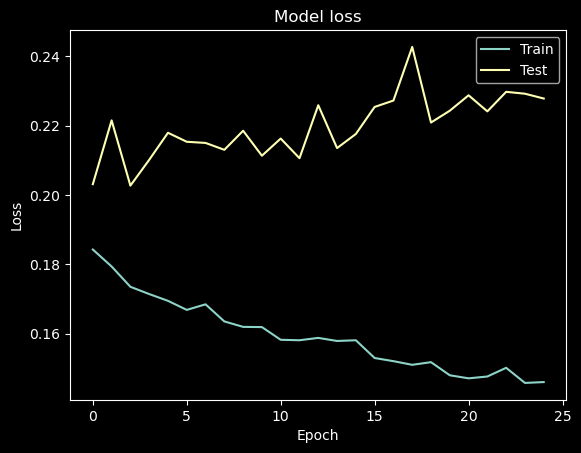

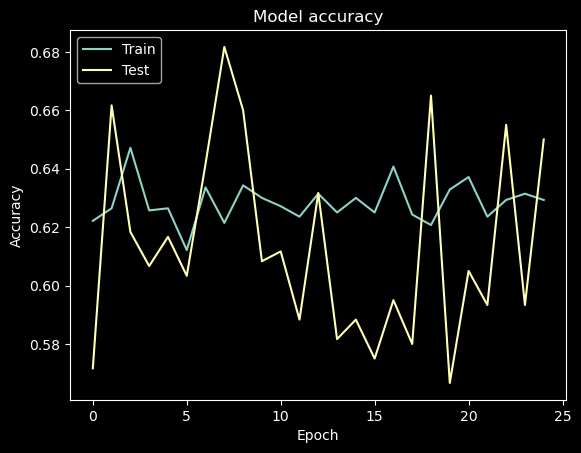

In [41]:
# Train your model and save its history
h_callback = model.fit(X_train, y_train,
                       epochs = 25,
                       validation_data=(X_test, y_test))
# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])
# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

These graphs are really useful for detecting overfitting and to know if your neural network would benefit from more training data.

### Early stopping your model

The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback parameter in the .fit() method.

The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, X_test and y_test are also available for your use.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(banknotes.iloc[:,:-1], banknotes['class'].cat.codes, test_size=412)

In [43]:
# Create a sequential model
model = Sequential()
# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))
# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Display a summary of your model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Import the early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)
# Train your model using the early stopping callback
model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test),
           callbacks=[monitor_val_acc])

Epoch 1/1000
30/30 [==============================] - 0s 3ms/step - loss: 1.1173 - accuracy: 0.6250 - val_loss: 0.7993 - val_accuracy: 0.6820
Epoch 2/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.7249 - accuracy: 0.7188 - val_loss: 0.5307 - val_accuracy: 0.7621
Epoch 3/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7865 - val_loss: 0.3695 - val_accuracy: 0.8131
Epoch 4/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8385 - val_loss: 0.2813 - val_accuracy: 0.8714
Epoch 5/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.2745 - accuracy: 0.8719 - val_loss: 0.2357 - val_accuracy: 0.8908
Epoch 6/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.2335 - accuracy: 0.8969 - val_loss: 0.2111 - val_accuracy: 0.9053
Epoch 7/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.2097 - accuracy: 0.9146 - val_loss: 0.1964 - val_accuracy: 0.9175
Epoch 

Now you won't ever fall short of epochs! Your model will stop early if the quantity monitored doesn't improve for the given amount of epochs.

### A combination of callbacks

Deep learning models can take a long time to train, especially when you move to deeper architectures and bigger datasets. Saving your model every time it improves as well as stopping it when it no longer does allows you to worry less about choosing the number of epochs to train for. You can also restore a saved model anytime and resume training where you left it.

The model training and validation data are available in your workspace as X_train, X_test, y_train, and y_test.

Use the EarlyStopping() and the ModelCheckpoint() callbacks so that you can go eat a jar of cookies while you leave your computer to work!

In [45]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)
# Save the best model as best_banknote_model.hdf5
model_checkpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)
# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, model_checkpoint],
                    validation_data = (X_test, y_test))

Epoch 1/1000000000000
30/30 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9698 - val_loss: 0.0960 - val_accuracy: 0.9757
Epoch 2/1000000000000
30/30 [==============================] - 0s 1ms/step - loss: 0.0946 - accuracy: 0.9698 - val_loss: 0.0950 - val_accuracy: 0.9757
Epoch 3/1000000000000
30/30 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.9698 - val_loss: 0.0941 - val_accuracy: 0.9757
Epoch 4/1000000000000
30/30 [==============================] - 0s 1ms/step - loss: 0.0927 - accuracy: 0.9698 - val_loss: 0.0931 - val_accuracy: 0.9757


You've learned a powerful callback combo! Nice moves!

Now you always save the model that performed best, even if you early stopped at one that was already performing worse.

In [46]:
tf.keras.models.load_model('best_banknote_model.hdf5').evaluate(X_test, y_test)

13/13 [==============================] - 0s 740us/step - loss: 0.0931 - accuracy: 0.9757


[0.093109130859375, 0.9757281541824341]